# Домашнее задание 1 - Классификация
<br>

Задание выполнил(а): *Телегина Анна, 524 группа*
<br>
**Дедлайн:** 23.04.2021 23:59


### О задании
В этом домашнем задании вы научитесь работать с CAS при помощи библиотеки swat, познакомитесь c библиотекой dlpy, позволяющей использовать функциональность SAS для глубинного обучения из Python, а так же постороите с помощью этих библиотек модель для классификации изображений одежды.
<br>
Для выполнения заданий нужно самостоятельно написать или дополнить написанный код, а так же письменно ответить на вопросы (в зависимости от задания).

**Домашнее задание построено следующим образом:**
- Подключение к серверу CAS
- Задание 1: Загрузка данных в CAS (1 балл)
- Задание 2: Посмотрим на данные (1 балл)
- Задание 3: Выделение валидационной выборки из train (1 балл)
- Задание 4: Построение нейронной сети (3 балла)
- Задание 5: Обучение сети (2 балла)
- Задание 6: Оценка качества полученной модели (2 балла)
- Дополнительное задание: Aугментации исходных данных (+2 балла)<br>

Итого, полностью выполнив задание вы получите 10 баллов. Вы также можете выполнить дополнительное задание, чтобы получить еще 2 бонусных балла.

### Формат сдачи

После того, как вы выполните домашную работу, поместите jupyter notebook с выполнеными заданиями, а так же все SAS-таблицы с сохраненными моделями в закрытый git-репозиторий на GitHub. Предоставьте доступ к репозиторию аккаунтам GazizovMarat и Ala1s (добавив в свой реппозиторий в качестве коллабораторов).

### Важно 
Для того, чтобы ваши результаты были воспроизводимыми для проверки, указывайте seed при вызове методов, где это возможно. Напоминания об этом так же содержатся в тексте заданий.

In [2]:
!pip3 install sas-dlpy --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [3]:
!pip3 install opencv-python --user

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [4]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from swat import *
from dlpy import Model, Sequential
from dlpy.layers import *
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split

## Подключение к серверу CAS

Подключитесь к серверу CAS под своим логином и паролем.<br>Загрузите следующие Action Sets: 'image','deepLearn'.<br>
<br>
Для выполнения задания обратитесь к документации по следующим ссылкам: <br>
- https://sassoftware.github.io/python-swat/getting-started.html <br>

In [5]:
#os.environ['CAS_CLIENT_SSL_CA_LIST'] = r"/tmp/4fix/trustedcerts.pem"

# Создаем новую сессию CAS:

s = CAS('tiger.cs.msu.ru', 5570, username='msu108', password='BabBage-8o')

# Загружаем action sets:

s.loadactionset('image')
s.loadactionset('deepLearn')
s.loadactionset('datastep')

NOTE: Added action set 'image'.
NOTE: Added action set 'deepLearn'.
NOTE: Added action set 'datastep'.


[actionset]

 'datastep'

+ Elapsed: 0.000833s, sys: 0.000772s, mem: 0.203mb

#### Загрузка данных
Для работы с изображениями в SAS DLPy используются специализированные таблицы - ImageTable. Для загрузки набора данных, помимо сессии CAS и названия для новой таблицы, требуется указать путь к папке с набором данных сервере. 
При загрузке нужно указать путь к папке, устроенной следующим образом: <br>
* shirt
    - shirt_image0.png
    - shirt_image1.png
    - ...
* pants
    - pants_image0.png
    - pants_image1.png
    - ...
* ... 
<br>
То есть, папка должна состоять из подпапок, называющихся соответственно классам обьектов на изображении. В каждой из таких подпапок должны лежать все изобращения с обьектами соответствующего класса.<br>
Папки train-images (обучающая выборка) и t10k-images (тестовая выборка) внутри папки data в этом репозитории устроены описанным выше образом. 
Также, данные fashion-MNIST можно скачать из следующего репозитория:<br> 
- https://github.com/zalandoresearch/fashion-mnist <br>

**Задание 1: Загрузка данных в CAS**<br>
Загрузите обучающие и тестовые данные в CAS, создав ImageTable (для каждой выборки отдельно).

In [7]:
# создайте ImageTable для обучающей выборки #
path = '/var/home/msu108/SAS-CV-2020-Homework1'
train_data = ImageTable.load_files(s, os.path.join(path,'data/train-images'))

In [8]:
# создайте ImageTable для тестовой выборки #
test_data = ImageTable.load_files(s, os.path.join(path,'data/t10k-images'))

**Задание 2: Исследование данных**<br>
а) С помощью метода show выведите 16 случайных изображений из ImageTable в таблице размером 4x4 ячейки (для train и test отдельно).

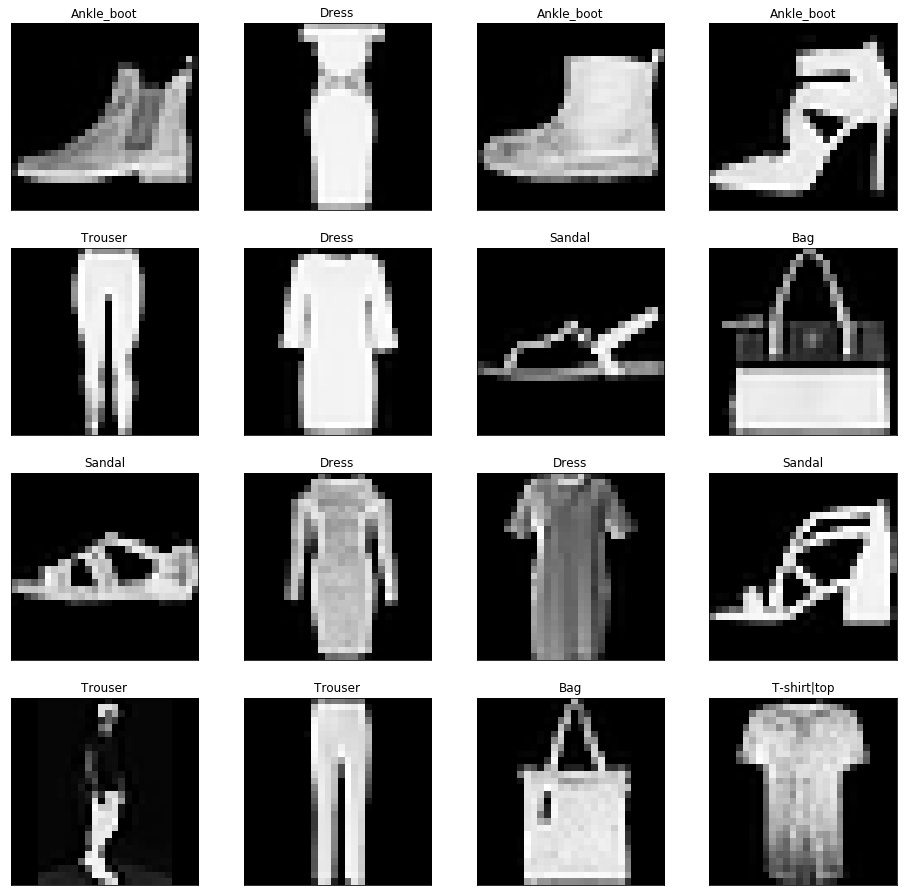

In [9]:
# выведите 16 изображений из обучающей выборки #
train_data.show(nimages=16, ncol=4)

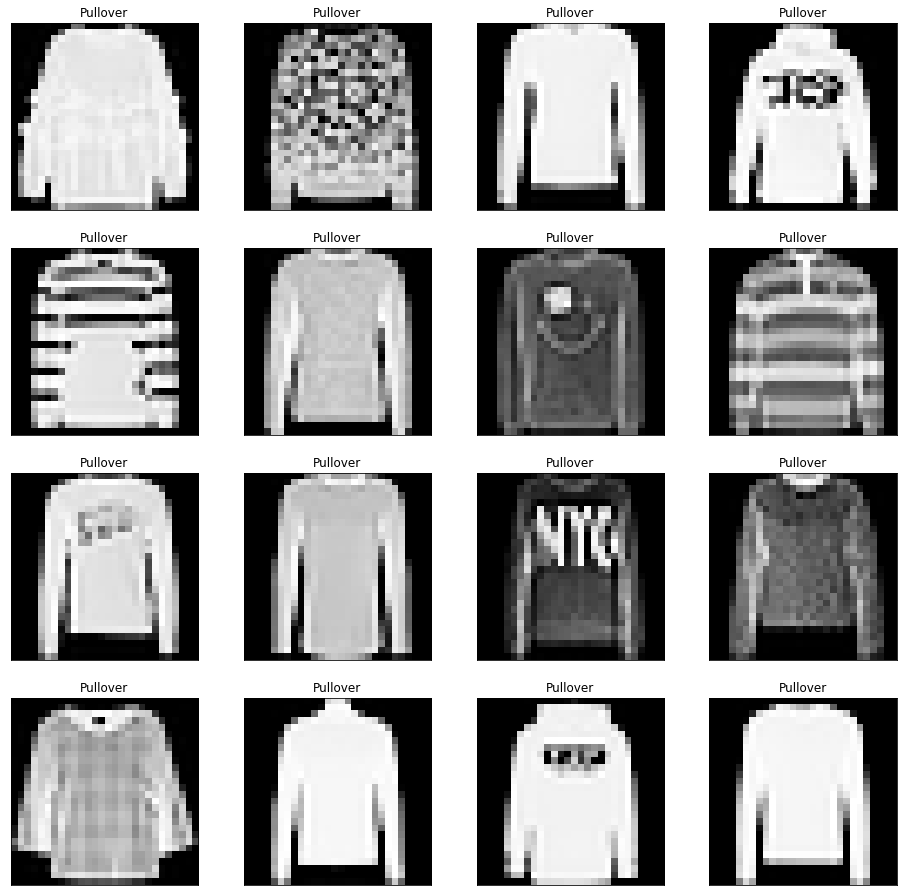

In [10]:
# выведите 16 изображений из тестовой выборки #
test_data.show(nimages=16, ncol=4)

b) Найдите метод класса ImageTable, позволяющий подсчитать статистику по метаданным таблицы (например, средние размеры или значения пикселей). Примените этот метод к таблицам, в которые вы загрузили наборы данных train и test.

In [11]:
# статистики по метаданным для train #
train_summary = train_data.image_summary
#print(train_summary)

In [12]:
# статистики по метаданным для test #
test_summary = test_data.image_summary
#print(test_summary)

**Задание 3: Выделение валидационной выборки из train**<br>
- Перед тем, как выделить из train выборку для валидации модели, посмотрите на распределение классов (с помощью свойства ImageTable).
- Выделите из таблицы train выборку в размере 15 процентов от исходного с помощью two_way_split. Убедитесь, что вы задали seed, для того, чтобы мы могли воспроизвести и проверить ваши результаты), а возвращаемые таблицы - типа ImageTable, как и исходная.
- После выделения validate выборки, снова посмотрите на распреление классов на train и validate выборках, чтобы убедиться, что в обеих выборках присутстует равное количество примеров для каждого из классов.

In [14]:
train_data.label_freq

,Level,Frequency
Ankle_boot,1,6000
Bag,2,6000
Coat,3,6000
Dress,4,6000
Pullover,5,6000
Sandal,6,6000
Shirt,7,6000
Sneaker,8,6000
T-shirt|top,9,6000
Trouser,10,6000


In [15]:
# код для деления на 2 выборки
train_data, val_data = two_way_split(tbl=train_data, test_rate=15, im_table=True, seed=555)

In [16]:
val_data.label_freq

,Level,Frequency
Ankle_boot,1,900
Bag,2,900
Coat,3,900
Dress,4,900
Pullover,5,900
Sandal,6,900
Shirt,7,900
Sneaker,8,900
T-shirt|top,9,900
Trouser,10,900


**Задание 4: Построение модели**<br>
Постройте модель, соответствующую изображенной на картинке, c помощью dlpy в Sequential-подходе.
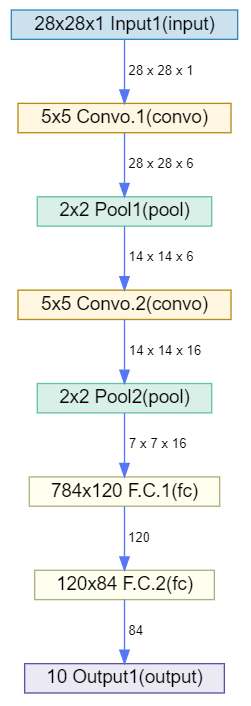

In [17]:
# код для построения модели #
my_model = Sequential(s)
my_model.add(InputLayer(1,28,28))
my_model.add(Conv2d(8, 5, 5))
my_model.add(Pooling(2, 2))
my_model.add(Conv2d(16, 5, 5))
my_model.add(Pooling(2, 2))
my_model.add(Dense(n=120, act='relu'))
my_model.add(Dense(n=84, act='relu'))
my_model.add(OutputLayer(act='softmax', n=10))

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


**Задание 5: Oбучение модели**<br>
а) Обучите построенную модель. Гиперпараметры для обучения уже заданы, менять их не требуется. Не забудьте задать seed, чтобы  ваши результаты были воспроизводимыми. Полученная вами модель должна показать Miscalssification Rate < 15% на тестовой выборке.

In [18]:
from dlpy.model import *
from dlpy import *
from dlpy.model import Optimizer
from dlpy.lr_scheduler import *

In [19]:
# Variable for Number of Epochs
nEpoch=50

# Variable for Number of Threads
nThread=4

# Variable for Batch Size
batchSize=128

# Calculate miniBatch Size
miniBatch=math.ceil(batchSize/nThread)

# Define Learning Rate scheduler parameters
lr_scheduler=ReduceLROnPlateau(conn=s, 
                               cool_down_iters=3, 
                               gamma=0.8, 
                               learning_rate=0.001, 
                               patience=5
                               )

# Define Momentum Solver parameters
solver=MomentumSolver(lr_scheduler=lr_scheduler,
                      clip_grad_max = 100, 
                      clip_grad_min = -100
                      )                       

# Define Solver optimizer parameter settings
optimizer=Optimizer(seed=12345, 
                    algorithm=solver, 
                    mini_batch_size = miniBatch, 
                    log_level=2, 
                    max_epochs=nEpoch, 
                    reg_l2=0.0005
                    )


The following argument(s) learning_rate, gamma, step_size, power are overwritten by the according arguments specified in lr_scheduler.


In [20]:
# код для обучения модели
train_history = my_model.fit(data=train_data, 
                          valid_table=val_data,
                          mini_batch_size=miniBatch,
                          max_epochs=nEpoch,
                          lr=lr_scheduler,
                          optimizer=optimizer,
                          seed=500)
                          

NOTE: Inputs=_image_ is used
NOTE: Training from scratch.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 108638.
NOTE:  The approximate memory cost is 160.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       0.06 (s).
NOTE:  The total number of threads on each worker is 40.
NOTE:  The total mini-batch size per thread on each worker is 32.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 1280.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:     10
NOTE:  Levels for the target variable:
NOTE:  Level      0: Ankle_boot 
NOTE:  Level      1: Bag        
NOTE:  Level      2: Coat       
NOTE:  Level      3: Dress      
NOTE:  Level      4: Pullover   
NOTE:  Level      5: Sandal     
NOTE:  Level      6: Shirt      
NOTE:  Level      7: Sneaker    
NOTE:  Level      8: T-shirt|top
NOTE:  Level      9: Trouser    
NOTE:  Number of input variables:     1
NOTE

b) Пользуясь значениями в history, постройте график, анологичный изображенному.
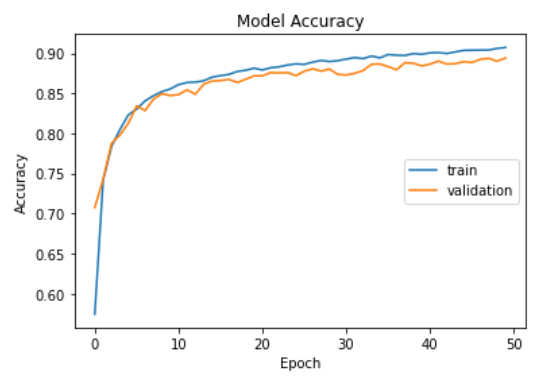

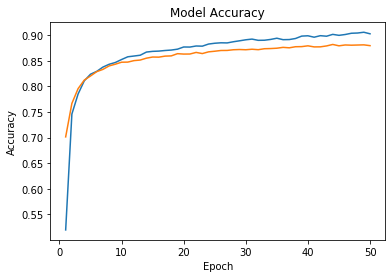

In [24]:
history = train_history["OptIterHistory"]
#print(history.keys())

#код для построения графика#
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.plot(history.Epoch, 1 - history.FitError)
plt.plot(history.Epoch, 1 - history.ValidError)

**Задание 6: Oценка качества модели**<br>

а) Выведите матрицу ошибок на валидационной выборке для модели и ответьте на следующие вопросы:
- Сколько изображений сумок было корректно классифицированно моделью?
- Сколько пулловеров было классифицированно моделью как рубашки? Наоборот?
- В классификации какого предмета одежды модель ошибалась чаще всего? А реже всего?

In [30]:
# код для вывода матрицы ошибок#
from dlpy.metrics import *
table = my_model.evaluate(val_data, model_task='CLASSIFICATION')['OutputCasTables']['casTable'][0]
confusion_matrix('_label_', 'I__label_', table)

,Ankle_boot,Bag,Coat,Dress,Pullover,Sandal,Shirt,Sneaker,T-shirt|top,Trouser
_label_,,,,,,,,,,
Ankle_boot,860.0,1.0,0.0,0.0,0.0,2.0,0.0,37.0,0.0,0.0
Bag,0.0,862.0,2.0,8.0,4.0,4.0,12.0,0.0,6.0,2.0
Coat,0.0,2.0,648.0,33.0,111.0,0.0,104.0,0.0,1.0,1.0
Dress,0.0,2.0,29.0,798.0,5.0,0.0,28.0,0.0,30.0,8.0
Pullover,0.0,2.0,51.0,8.0,741.0,0.0,88.0,0.0,8.0,2.0
Sandal,12.0,4.0,0.0,0.0,0.0,850.0,2.0,32.0,0.0,0.0
Shirt,0.0,9.0,30.0,23.0,66.0,0.0,653.0,0.0,115.0,4.0
Sneaker,16.0,2.0,0.0,0.0,0.0,17.0,0.0,864.0,1.0,0.0
T-shirt|top,0.0,3.0,4.0,27.0,11.0,0.0,100.0,0.0,753.0,2.0


Ваши ответы на вопросы:

1) 862

2) 88, 66 

3) чаще - Coat, реже - Trouser

b) Проскорьте модель на тестовой выборке.

In [31]:
# код для скоринга #
table = my_model.evaluate(test_data, model_task="CLASSIFICATION")["ScoreInfo"]

c) Выведите пример изображения, классифицированного верно, с помощью встроенной функции класса Model.

NOTE: Table TEMP_PLOT contains compressed images.
NOTE: Cloud Analytic Services dropped table TEMP_PLOT from caslib CASUSER(msu108).


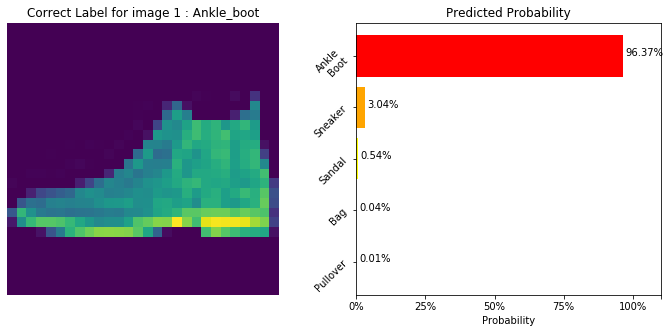

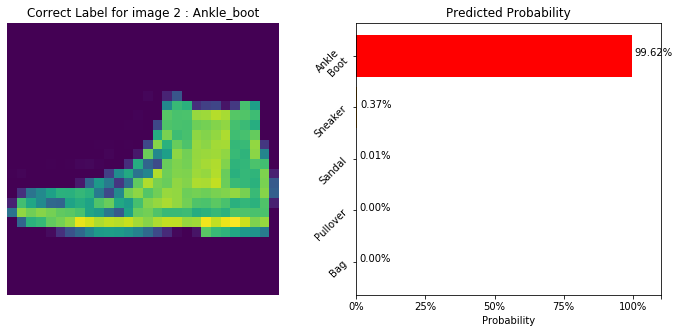

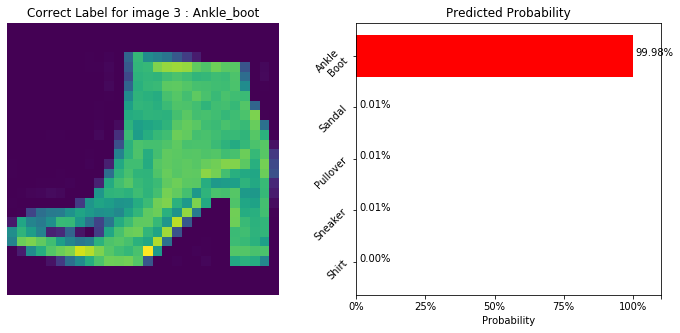

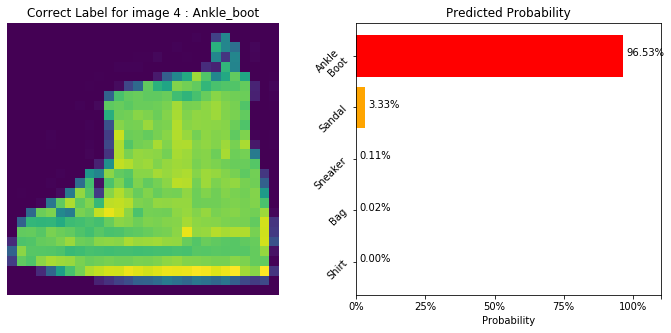

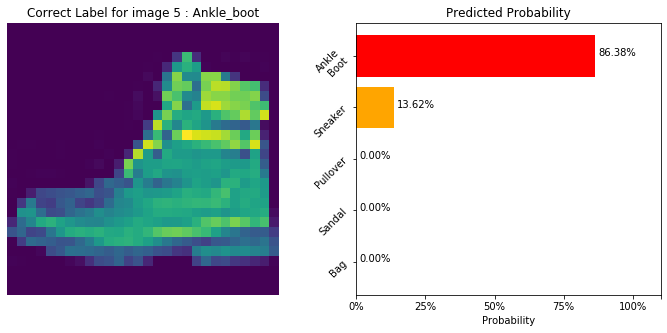

In [32]:
# код для вывода верно классифицированного изображения#
my_model.plot_evaluate_res(img_type="C")

d) Выведите пример изображения, классифицированного ошибочно, с помощью встроенной функции класса Model.

NOTE: Table TEMP_PLOT contains compressed images.
NOTE: Cloud Analytic Services dropped table TEMP_PLOT from caslib CASUSER(msu108).


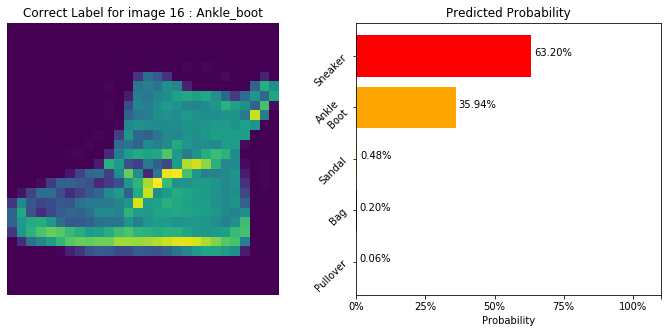

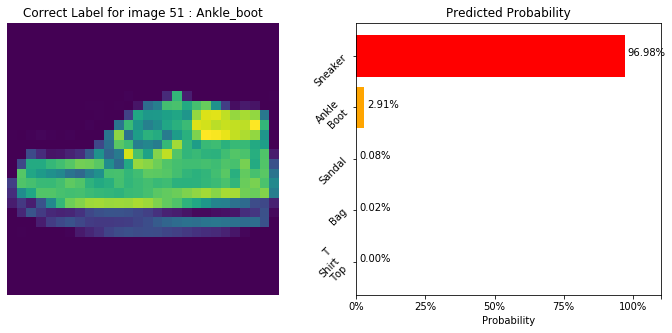

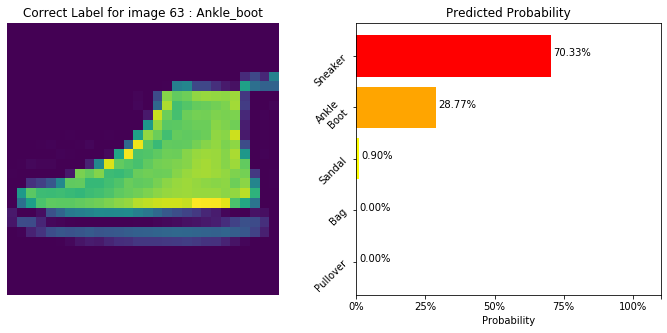

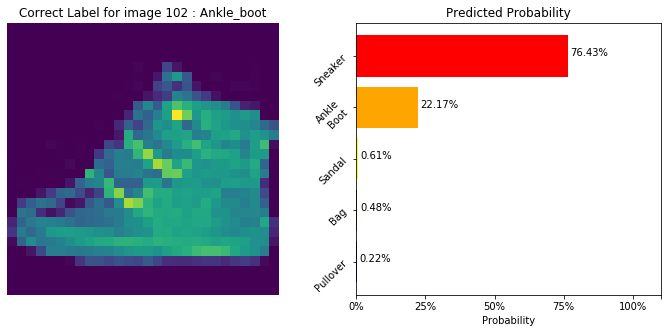

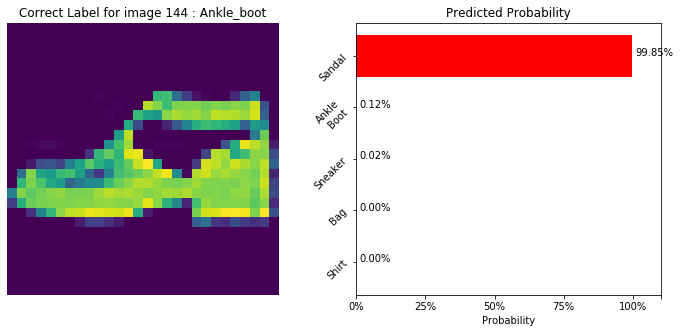

In [33]:
# код для вывода неверно классифицированного изображения#
my_model.plot_evaluate_res(img_type="M")

e) Сохраните полученную модель в SAS-таблицу, с помощью одного из методов класса Model.

In [34]:
# код для сохранения модели #
my_model.save_to_table(os.getcwd())

NOTE: Model table saved successfully.


**Дополнительное задание: Aугментации исходных данных**<br>
Изучите документацию к CAS-action augmentImages. Попробуйте улучшить результат предыдущей модели, применив аугментации к исходным данным и, по желанию, другие техники для улучшения качества модели. Полученную модель проскорьте на тестовой выборке и сохраните в SAS-таблицу. Выведите метрики качества новой модели на тестовой выборке.

In [13]:
s.augmentImages(table=train_data, casOut={}, cropList=[{"useWholeImage":True, "mutations":{
    "verticalFlip":True
}}])

NOTE: Table IMAGEDATA_QOZRGM contains compressed images.
NOTE: 120000 images were produced successfully out of 60000 input images and saved as compressed images to the Cloud Analytic Services table .


,casLib,Name,Label,Rows,Columns,casTable
0,CASUSER(msu108),_T_MQHLNUBK_DZRJL4SO_QRFJMCD2IJ,,120000,10,"CASTable('_T_MQHLNUBK_DZRJL4SO_QRFJMCD2IJ', ca..."
